In [23]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import Tuple, Optional

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
%load_ext autoreload
%autoreload 2
import fork_simulation as F
from custom_composite import CustomLayup, PlyProperties, MaterialType, create_layup_from_sequence

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Fork mass: 0.20 kg
Fork cost: £9.89
Natural frequency (1st mode): 4330.13 Hz


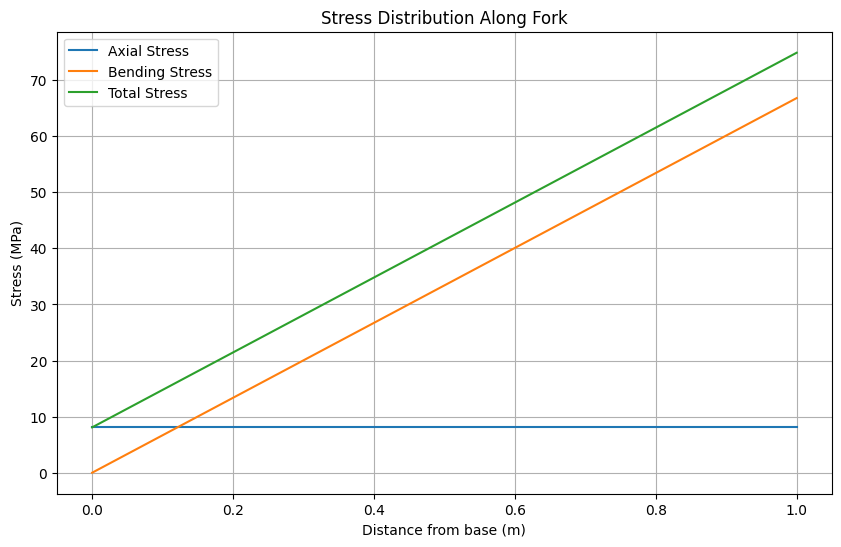

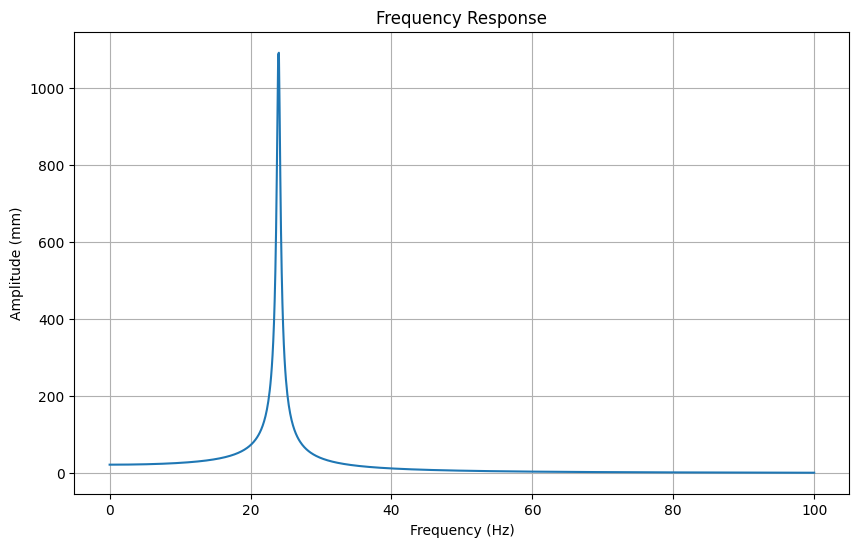

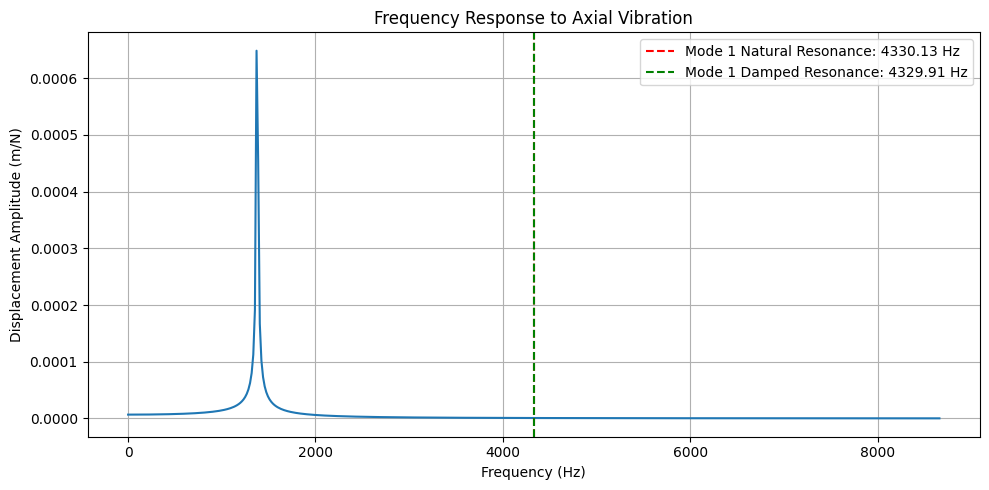

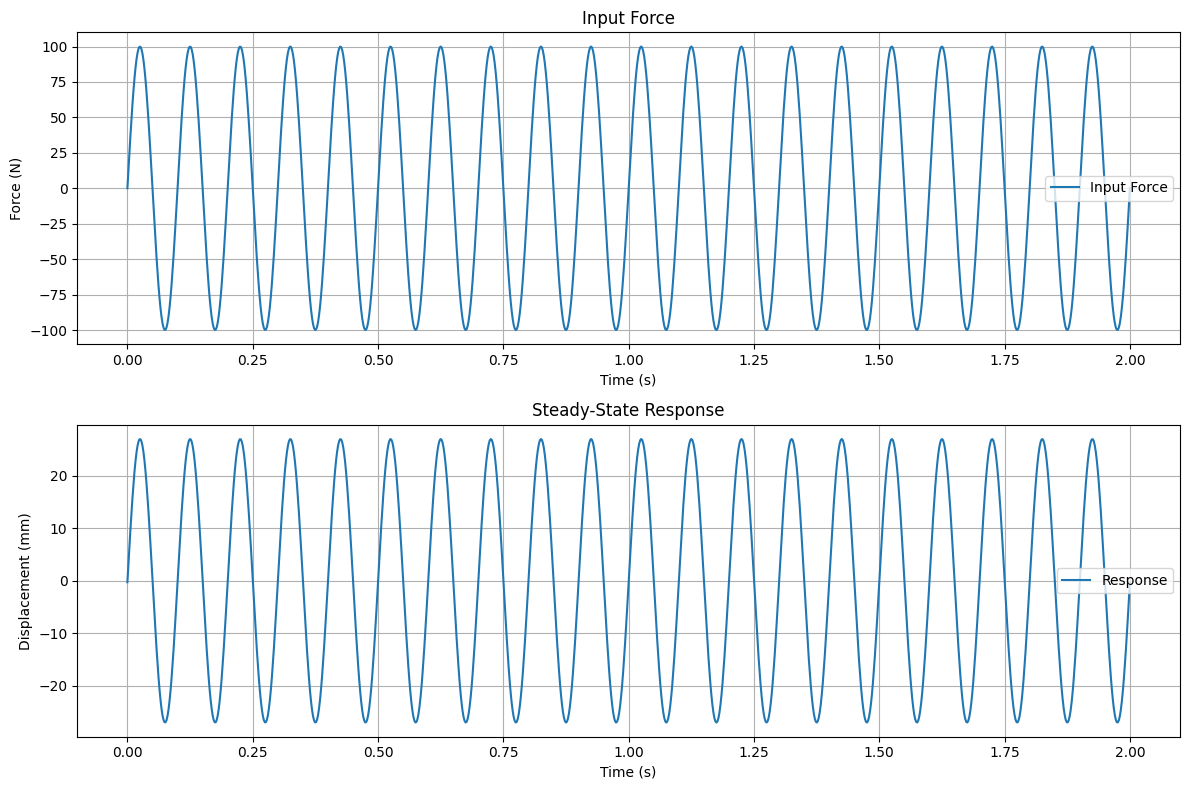

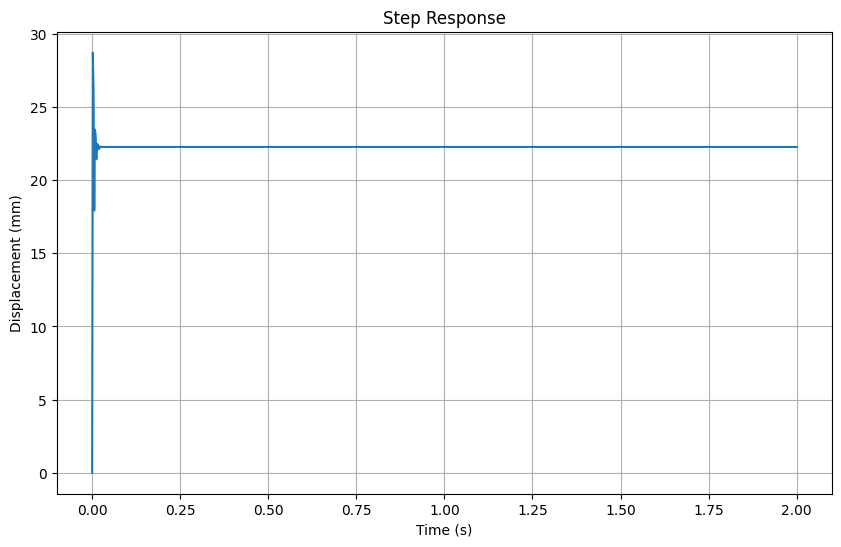

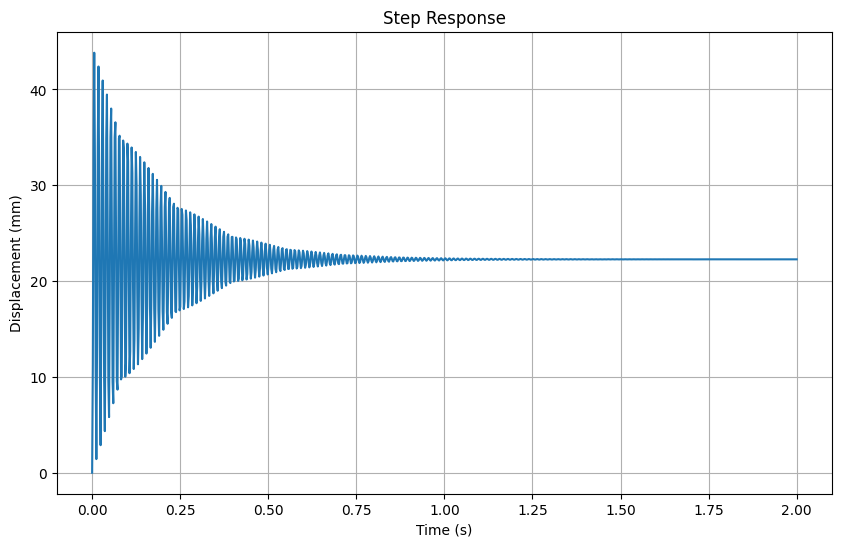

In [25]:
# Example material properties (Carbon Fiber)
material = F.MaterialProperties(
    E_axial=120,  # GPa
    E_transverse=8,  # GPa
    G=4.5,  # GPa
    nu=0.3,
    rho=1600,  # kg/m³
    cost_per_kg=50,  # £/kg
    damping_ratio=0.01
)

# Example geometry
geometry = F.ForkGeometry(
    length=1,  # m
    outer_diameter=0.05,  # m
    wall_thickness=0.0008  # m
)

# Create simulation
fork = F.ForkSimulation(material, geometry)

# Print basic properties
print(f"Fork mass: {fork.mass:.2f} kg")
print(f"Fork cost: £{fork.cost:.2f}")
print(f"Natural frequency (1st mode): {fork.natural_frequency()[0]:.2f} Hz")

# Example analysis
fork.plot_stress_distribution(axial_force=1000, transverse_force=100)  # 1000N axial, 500N transverse
fork.plot_frequency_response(force_amplitude=100, frequency_range=(0,100))
fork.plot_axial_frequency_response(force_amplitude=100)  # 100N force, 0-100Hz range 

# Time domain analysis
fork.plot_steady_state_vibration(force_amplitude=100, frequency=10)  # 100N at 10Hz
fork.plot_step_response(force_amplitude=100)  # 100N step force 
fork.plot_flex_step_response(force_amplitude=100)  # 100N step force 

In [26]:
%run custom_composite.py


Layup 1 Properties:
E_x: 14.308
E_y: 15.486
nu_xy: 0.379
G_xy: 19.158
thickness: 0.550
density: 1701.818
mass_per_area: 0.936

Layup 1 Ply Stresses (MPa):

Carbon 0° at z = -0.23 mm:
Global stresses: σx = 3.2, σy = -0.6, τxy = -0.2
Material stresses: σ1 = 3.2, σ2 = -0.6, τ12 = -0.2

Glass 45° at z = -0.08 mm:
Global stresses: σx = 1.1, σy = 0.3, τxy = 0.5
Material stresses: σ1 = 1.2, σ2 = 0.2, τ12 = -0.4

Kevlar -45° at z = 0.10 mm:
Global stresses: σx = 1.7, σy = 1.3, τxy = -0.8
Material stresses: σ1 = 2.3, σ2 = 0.7, τ12 = 0.2

Carbon 90° at z = 0.22 mm:
Global stresses: σx = 2.0, σy = -1.8, τxy = 0.5
Material stresses: σ1 = -1.8, σ2 = 2.0, τ12 = -0.5

Layup 2 Properties:
E_x: 20.703
E_y: 19.844
nu_xy: 0.456
G_xy: 36.156
thickness: 0.400
density: 1700.000
mass_per_area: 0.680

Layup 2 Ply Stresses (MPa):

Custom 0° at z = -0.15 mm:
Global stresses: σx = 3.6, σy = -0.7, τxy = -0.1
Material stresses: σ1 = 3.6, σ2 = -0.7, τ12 = -0.1

Carbon 45° at z = -0.05 mm:
Global stresses: σx = 1.7

In [44]:
sequence3 = [
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 0, 'name': 'Carbon 0°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 45, 'name': 'Carbon 45°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': -45, 'name': 'Carbon -45°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 0, 'name': 'Carbon 0°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 0, 'name': 'Carbon 0°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': -45, 'name': 'Carbon -45°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 45, 'name': 'Carbon 45°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 0, 'name': 'Carbon 0°'}
]

layup3 = create_layup_from_sequence(sequence3)

props = layup3.calculate_effective_properties()
for key, value in props.items():
    print(f"{key}: {value:.3f}")

E_x: 76.394
E_y: 21.502
nu_xy: 0.740
G_xy: 39.059
thickness: 0.800
density: 1600.000
mass_per_area: 1.280


In [28]:
print(props['E_x'])

76.39433237864722


Fork mass: 0.20 kg
Fork cost: £9.89
Natural frequency (1st mode): 3454.94 Hz


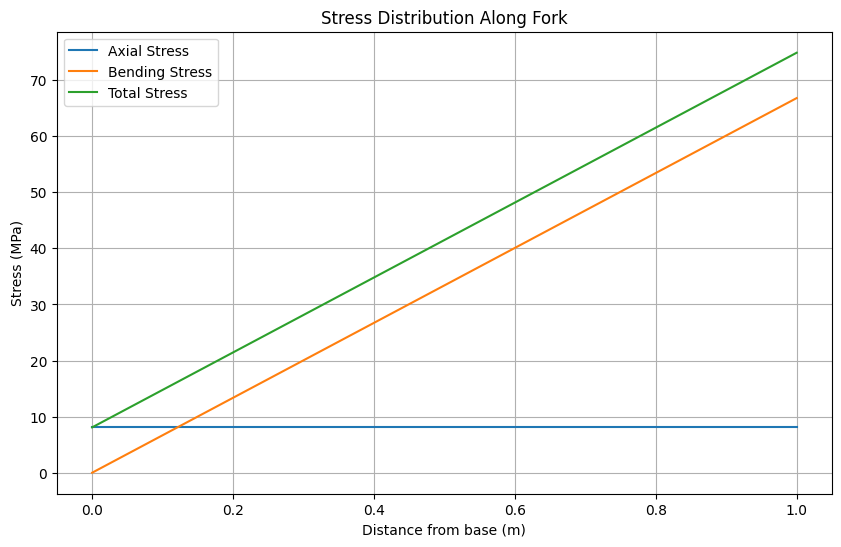

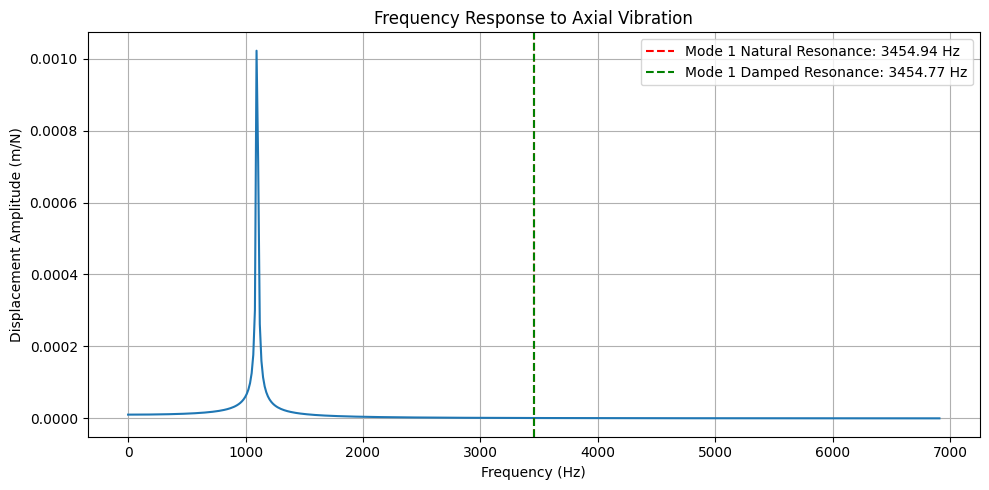

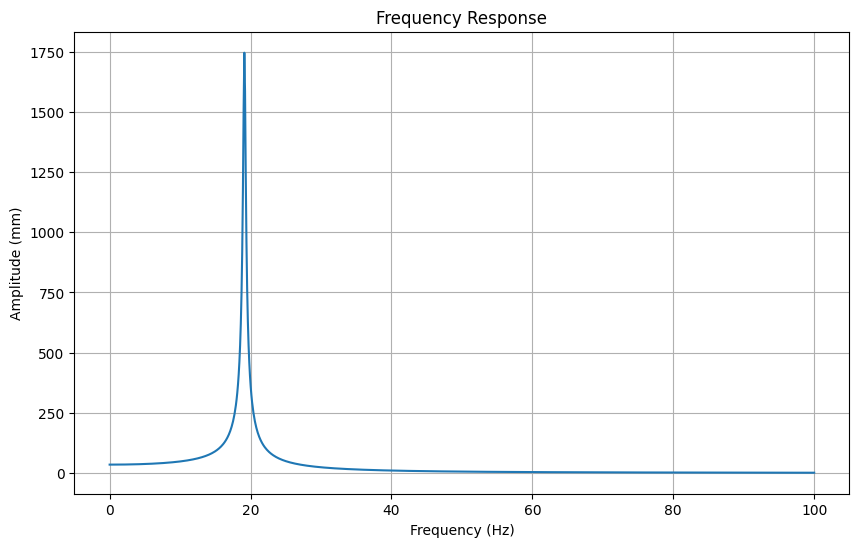

[3454.9405833]


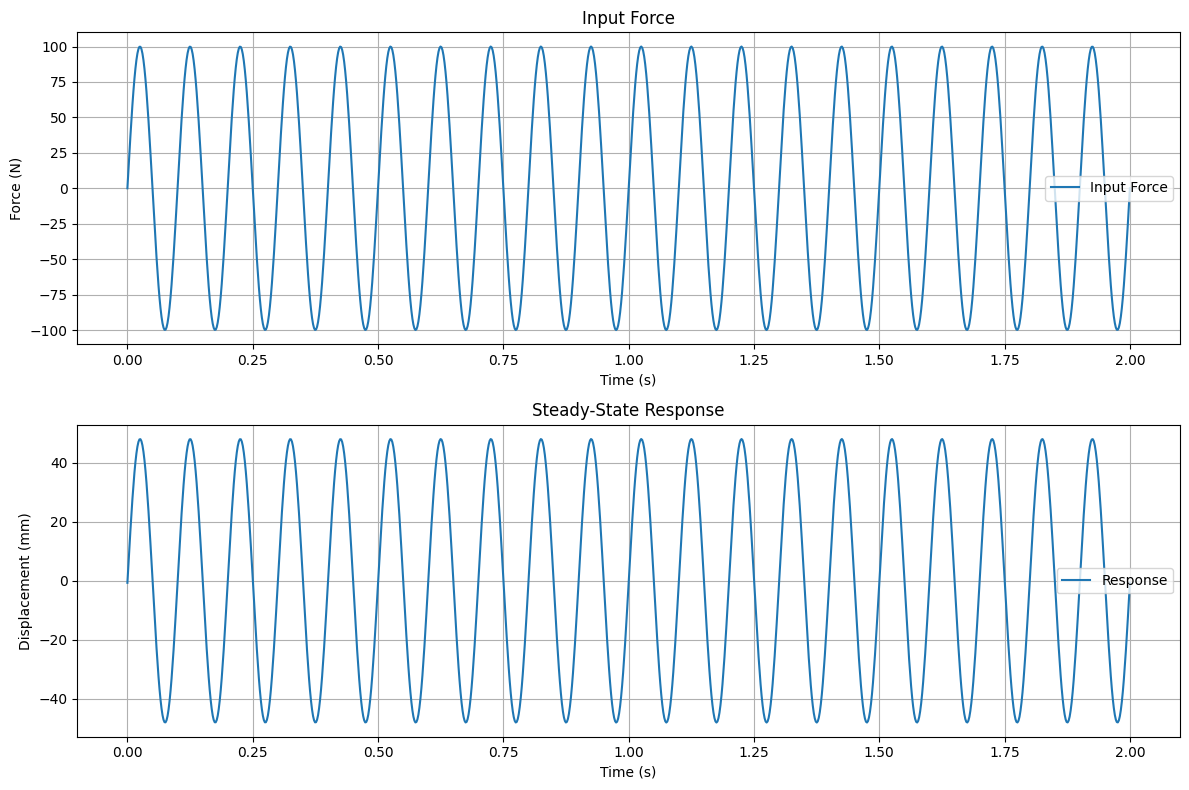

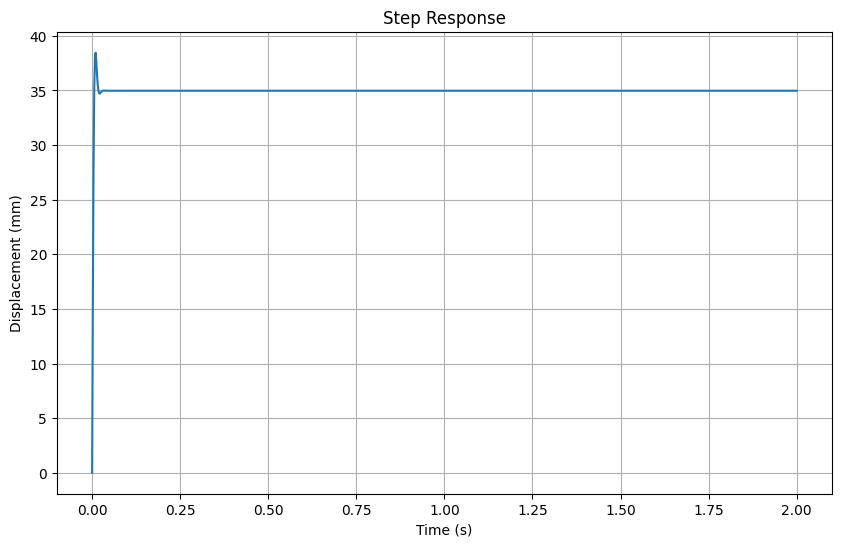

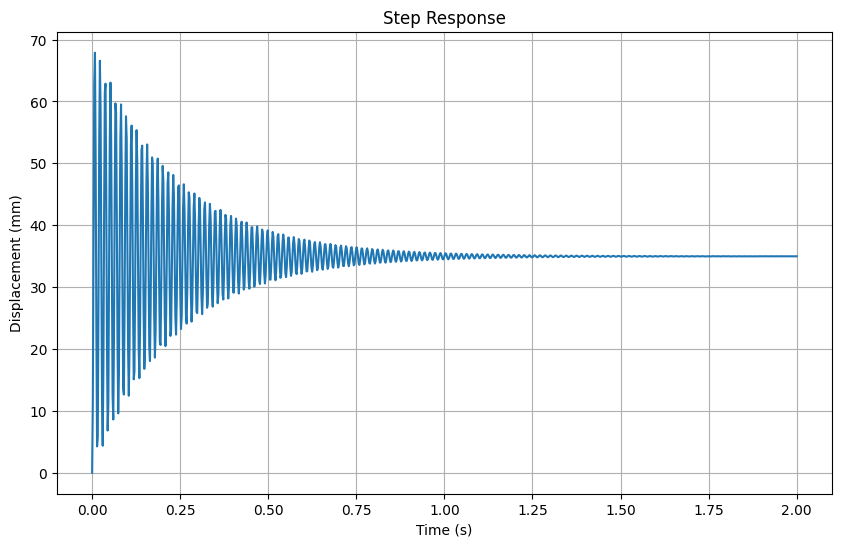

In [29]:
# Example material properties (Carbon Fiber)
material = F.MaterialProperties(
    E_axial=props['E_x'],  # GPa
    E_transverse=props['E_y'],  # GPa
    G=props['G_xy'],  # GPa
    nu=props['nu_xy'],
    rho=props['density'],  # kg/m³
    cost_per_kg=50,  # £/kg
    damping_ratio=0.01
)

# Example geometry
geometry = F.ForkGeometry(
    length=1,  # m
    outer_diameter=0.05,  # m
    wall_thickness=props['thickness']*1e-3  # m
)

# Create simulation
fork = F.ForkSimulation(material, geometry)

# Print basic properties
print(f"Fork mass: {fork.mass:.2f} kg")
print(f"Fork cost: £{fork.cost:.2f}")
print(f"Natural frequency (1st mode): {fork.natural_frequency()[0]:.2f} Hz")

# Example analysis
fork.plot_stress_distribution(axial_force=1000, transverse_force=100)  # 1000N axial, 500N transverse
fork.plot_axial_frequency_response(force_amplitude=100)  # 100N force, 0-100Hz range 
fork.plot_frequency_response(force_amplitude=100, frequency_range=(0,100))
print(fork.natural_frequency())

# Time domain analysis
fork.plot_steady_state_vibration(force_amplitude=100, frequency=10)  # 100N at 10Hz
fork.plot_step_response(force_amplitude=100)  # 100N step force 
fork.plot_flex_step_response(force_amplitude=100)  # 100N step force 



# Now with flax

In [46]:
sequence4 = [
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 0, 'name': 'Flax 0°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 0, 'name': 'Carbon 0°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 45, 'name': 'Flax 45°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': -45, 'name': 'Flax -45°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 0, 'name': 'Carbon 0°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 0, 'name': 'Carbon 0°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': -45, 'name': 'Flax -45°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 45, 'name': 'Flax 45°'},
    {'material_type': MaterialType.CARBON_T300, 'thickness': 0.1, 'orientation': 0, 'name': 'Carbon 0°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 0, 'name': 'Flax 0°'}
]

layup4 = create_layup_from_sequence(sequence4)

props = layup4.calculate_effective_properties()
for key, value in props.items():
    print(f"{key}: {value:.3f}")

E_x: 62.894
E_y: 8.053
nu_xy: 0.564
G_xy: 9.437
thickness: 1.000
density: 1420.000
mass_per_area: 1.420


Fork mass: 0.05 kg
Fork cost: £2.59
Natural frequency (1st mode): 8318.99 Hz


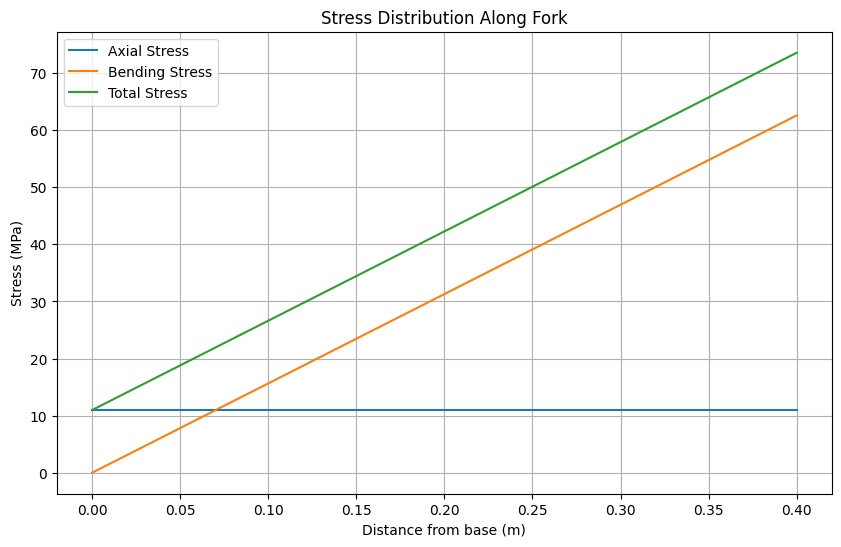

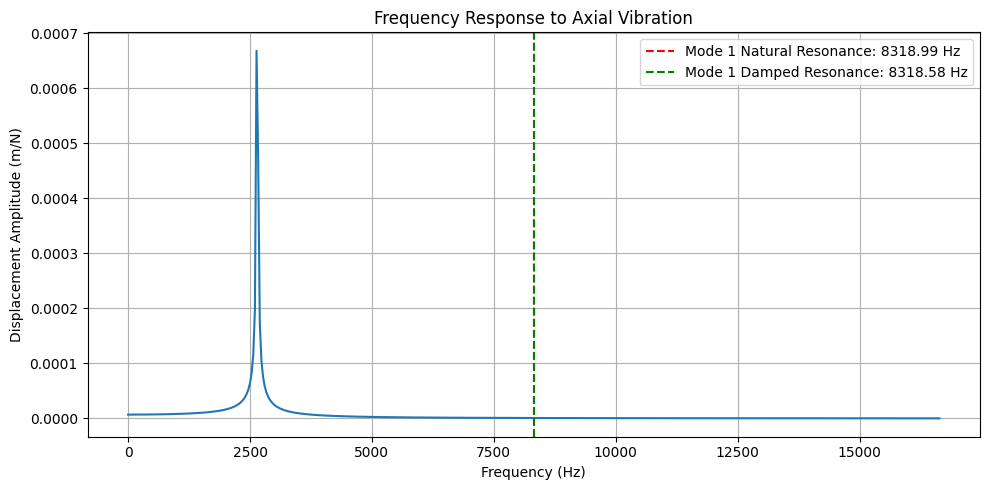

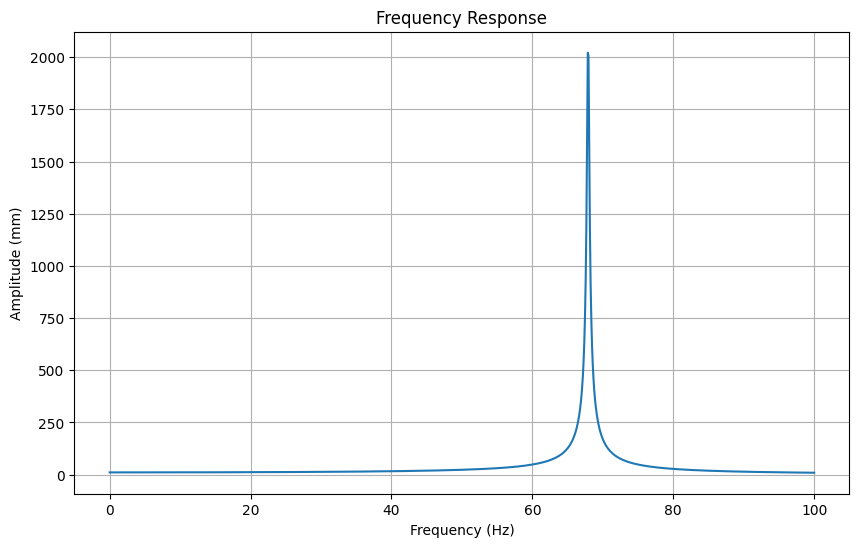

[8318.99244411]


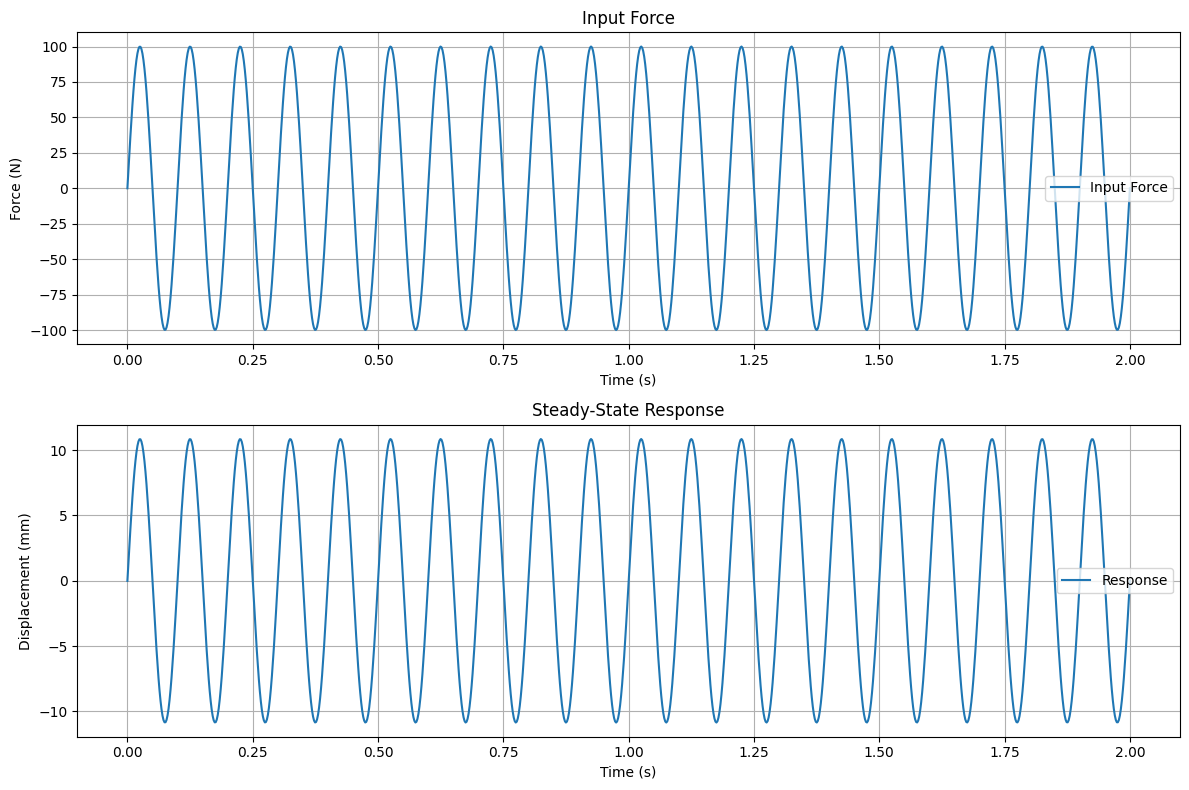

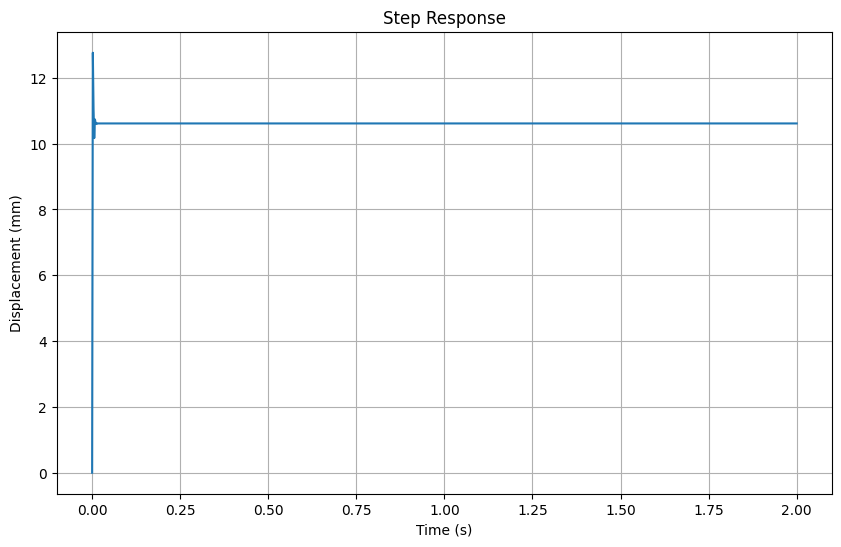

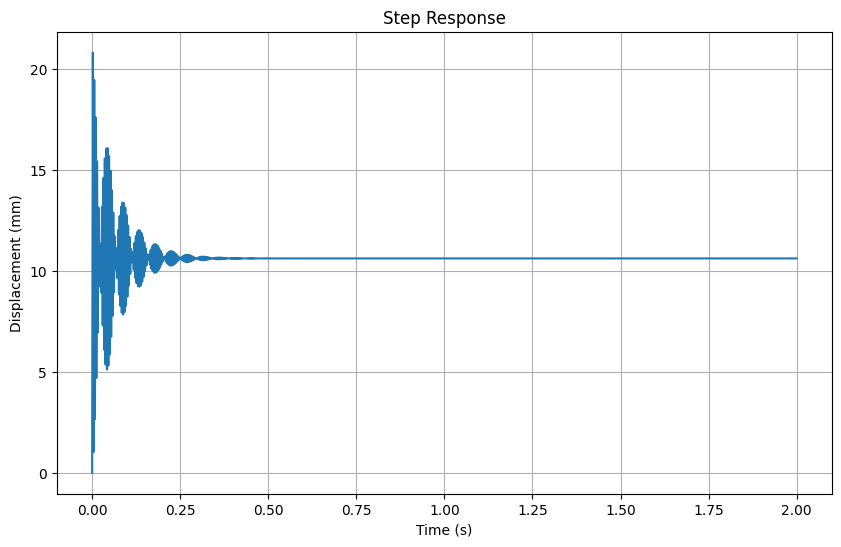

In [31]:
# Example material properties (hybrid)
material = F.MaterialProperties(
    E_axial=props['E_x'],  # GPa
    E_transverse=props['E_y'],  # GPa
    G=props['G_xy'],  # GPa
    nu=props['nu_xy'],
    rho=props['density'],  # kg/m³
    cost_per_kg=50,  # £/kg
    damping_ratio=0.01
)

# Example geometry
geometry = F.ForkGeometry(
    length=0.4,  # m
    outer_diameter=0.03,  # m
    wall_thickness=props['thickness']*1e-3  # m
)

# Create simulation
fork = F.ForkSimulation(material, geometry)

# Print basic properties
print(f"Fork mass: {fork.mass:.2f} kg")
print(f"Fork cost: £{fork.cost:.2f}")
print(f"Natural frequency (1st mode): {fork.natural_frequency()[0]:.2f} Hz")

# Example analysis
fork.plot_stress_distribution(axial_force=1000, transverse_force=100)  # 1000N axial, 500N transverse
fork.plot_axial_frequency_response(force_amplitude=100)  # 100N force, 0-100Hz range 
fork.plot_frequency_response(force_amplitude=100, frequency_range=(0,100))
print(fork.natural_frequency())

# Time domain analysis
fork.plot_steady_state_vibration(force_amplitude=100, frequency=10)  # 100N at 10Hz
fork.plot_step_response(force_amplitude=100)  # 100N step force 
fork.plot_flex_step_response(force_amplitude=100)  # 100N step force 



# Other Layups

In [47]:
sequence5 = [
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 0, 'name': 'Flax 0°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 0, 'name': 'Flax 0°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 45, 'name': 'Flax 45°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': -45, 'name': 'Flax -45°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 0, 'name': 'Flax 0°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 0, 'name': 'Flax 0°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': -45, 'name': 'Flax -45°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 45, 'name': 'Flax 45°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 0, 'name': 'Flax 0°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 0, 'name': 'Flax 0°'}
]

layup5 = create_layup_from_sequence(sequence5)

props = layup5.calculate_effective_properties()
for key, value in props.items():
    print(f"{key}: {value:.3f}")

E_x: 19.511
E_y: 5.623
nu_xy: 0.646
G_xy: 7.237
thickness: 1.000
density: 1300.000
mass_per_area: 1.300


In [48]:
sequence6 = [
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 0, 'name': 'Flax 0°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 45, 'name': 'Flax 45°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': -45, 'name': 'Flax -45°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 0, 'name': 'Flax 0°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 0, 'name': 'Flax 0°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': -45, 'name': 'Flax -45°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 45, 'name': 'Flax 45°'},
    {'material_type': MaterialType.Flax_generic, 'thickness': 0.1, 'orientation': 0, 'name': 'Flax 0°'},
]

layup6 = create_layup_from_sequence(sequence6)

props = layup6.calculate_effective_properties()
for key, value in props.items():
    print(f"{key}: {value:.3f}")

E_x: 16.750
E_y: 5.805
nu_xy: 0.697
G_xy: 8.696
thickness: 0.800
density: 1300.000
mass_per_area: 1.040


In [34]:


# Print results for both layups
for i, layup in enumerate([layup3, layup4, layup6], 1):
    print(f"\nLayup {i} Properties:")
    props = layup.calculate_effective_properties()
    for key, value in props.items():
        print(f"{key}: {value:.3f}")
    
    # Example stress analysis
    loads = {
        'Nx': 1000,  # N/m
        'Ny': 100,
        'Nxy': 0,
        'Mx': 0,
        'My': 0,
        'Mxy': 0
    }
    
    stresses = layup.get_ply_stresses(loads)
    print(f"\nLayup {i} Ply Stresses (MPa):")
    for ply in stresses:
        print(f"\n{ply['ply_name']} at z = {ply['z_location']:.2f} mm:")
        print(f"Global stresses: σx = {ply['stress_global'][0]:.1f}, σy = {ply['stress_global'][1]:.1f}, τxy = {ply['stress_global'][2]:.1f}")
        print(f"Material stresses: σ1 = {ply['stress_material'][0]:.1f}, σ2 = {ply['stress_material'][1]:.1f}, τ12 = {ply['stress_material'][2]:.1f}") 


Layup 1 Properties:
E_x: 76.394
E_y: 21.502
nu_xy: 0.740
G_xy: 39.059
thickness: 0.800
density: 1600.000
mass_per_area: 1.280

Layup 1 Ply Stresses (MPa):

Carbon 0° at z = -0.35 mm:
Global stresses: σx = 2.1, σy = -0.0, τxy = 0.0
Material stresses: σ1 = 2.1, σ2 = -0.0, τ12 = 0.0

Carbon 45° at z = -0.25 mm:
Global stresses: σx = 0.4, σy = 0.3, τxy = 0.3
Material stresses: σ1 = 0.6, σ2 = 0.1, τ12 = -0.1

Carbon -45° at z = -0.15 mm:
Global stresses: σx = 0.4, σy = 0.3, τxy = -0.3
Material stresses: σ1 = 0.6, σ2 = 0.1, τ12 = 0.1

Carbon 0° at z = -0.05 mm:
Global stresses: σx = 2.1, σy = -0.0, τxy = 0.0
Material stresses: σ1 = 2.1, σ2 = -0.0, τ12 = 0.0

Carbon 0° at z = 0.05 mm:
Global stresses: σx = 2.1, σy = -0.0, τxy = -0.0
Material stresses: σ1 = 2.1, σ2 = -0.0, τ12 = -0.0

Carbon -45° at z = 0.15 mm:
Global stresses: σx = 0.4, σy = 0.3, τxy = -0.3
Material stresses: σ1 = 0.6, σ2 = 0.1, τ12 = 0.1

Carbon 45° at z = 0.25 mm:
Global stresses: σx = 0.4, σy = 0.3, τxy = 0.3
Material st

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

layups = [layup3, layup4, layup5]

# Collect results for each layup
results = []
for i, layup in enumerate(layups, 1):
    props = layup.calculate_effective_properties()
    props['Layup'] = ['CFRP', 'Hybrid', 'FFRP'][i-1]
    results.append(props)

# Convert to DataFrame
df = pd.DataFrame(results)

# Optional: reorder columns to have 'Layup' first
cols = ['Layup'] + [col for col in df.columns if col != 'Layup']
df = df[cols]

print(df)

# If you want to save as a CSV or LaTeX table for your report:
df.to_csv('layup_properties.csv', index=False)
# or for LaTeX (requires pandas 1.0+)
print(df.to_latex(index=False))


    Layup        E_x        E_y     nu_xy       G_xy  thickness  density  \
0    CFRP  76.394332  21.501654  0.739569  39.059009        0.8   1600.0   
1  Hybrid  62.894081   8.053434  0.563836   9.436761        1.0   1420.0   
2    FFRP  19.511106   5.623336  0.646445   7.236761        1.0   1300.0   

   mass_per_area  
0           1.28  
1           1.42  
2           1.30  
\begin{tabular}{lrrrrrrr}
\toprule
Layup & E_x & E_y & nu_xy & G_xy & thickness & density & mass_per_area \\
\midrule
CFRP & 76.394332 & 21.501654 & 0.739569 & 39.059009 & 0.800000 & 1600.000000 & 1.280000 \\
Hybrid & 62.894081 & 8.053434 & 0.563836 & 9.436761 & 1.000000 & 1420.000000 & 1.420000 \\
FFRP & 19.511106 & 5.623336 & 0.646445 & 7.236761 & 1.000000 & 1300.000000 & 1.300000 \\
\bottomrule
\end{tabular}



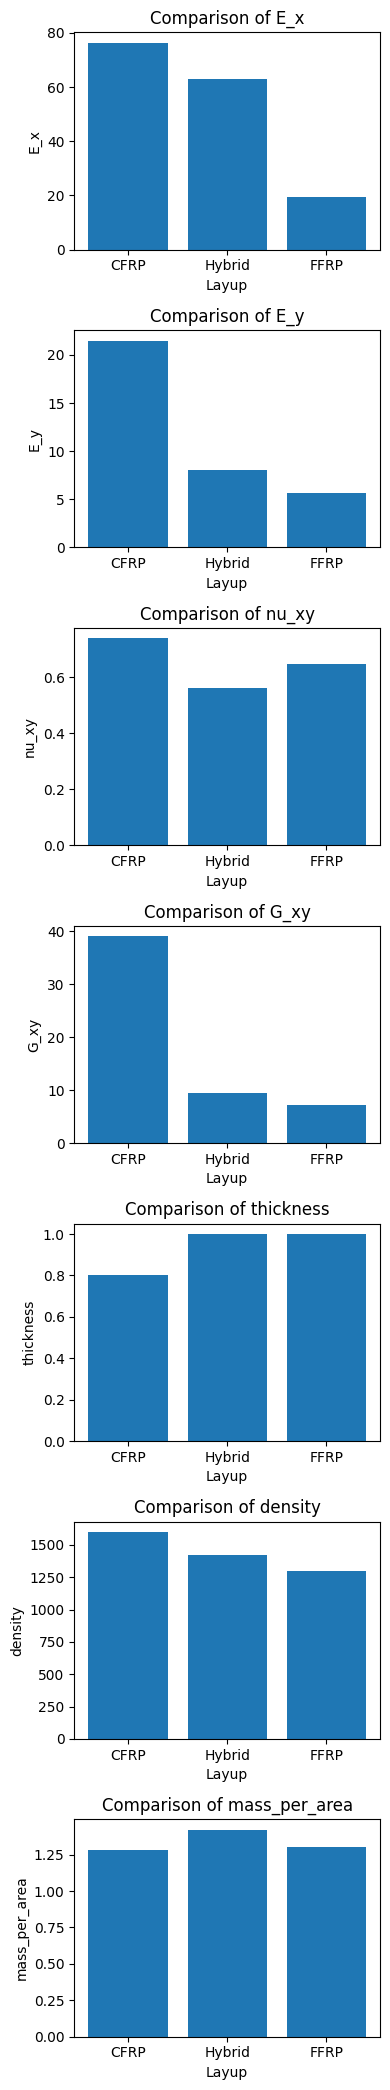

In [42]:
properties_to_plot = [col for col in df.columns if col != 'Layup']

fig, axs = plt.subplots(len(properties_to_plot), 1, figsize=(4, 3*len(properties_to_plot)))

for ax, prop in zip(axs, properties_to_plot):
    ax.bar(df['Layup'], df[prop])
    ax.set_title(f'Comparison of {prop}')
    ax.set_ylabel(prop)
    ax.set_xlabel('Layup')

plt.tight_layout()
plt.show()


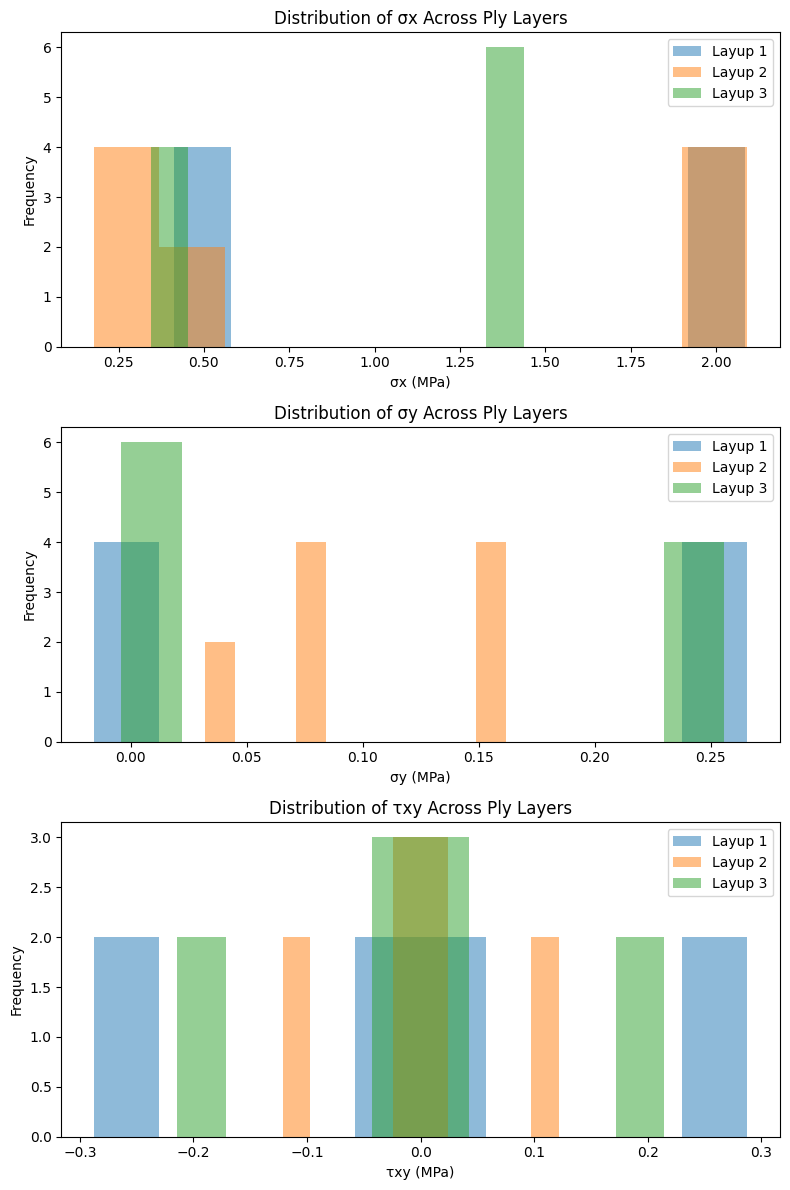

In [37]:
stress_components = ['σx', 'σy', 'τxy']
stress_data = {f'Layup {i+1}': {comp: [] for comp in stress_components} for i in range(len(layups))}

for i, layup in enumerate(layups):
    loads = {
        'Nx': 1000,
        'Ny': 100,
        'Nxy': 0,
        'Mx': 0,
        'My': 0,
        'Mxy': 0
    }
    stresses = layup.get_ply_stresses(loads)
    for ply in stresses:
        s = ply['stress_global']
        stress_data[f'Layup {i+1}']['σx'].append(s[0])
        stress_data[f'Layup {i+1}']['σy'].append(s[1])
        stress_data[f'Layup {i+1}']['τxy'].append(s[2])

# Plot histograms
fig, axs = plt.subplots(len(stress_components), 1, figsize=(8, 4*len(stress_components)))

for ax, comp in zip(axs, stress_components):
    for layup_label in stress_data:
        ax.hist(stress_data[layup_label][comp], alpha=0.5, label=layup_label)
    ax.set_title(f'Distribution of {comp} Across Ply Layers')
    ax.set_xlabel(f'{comp} (MPa)')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()


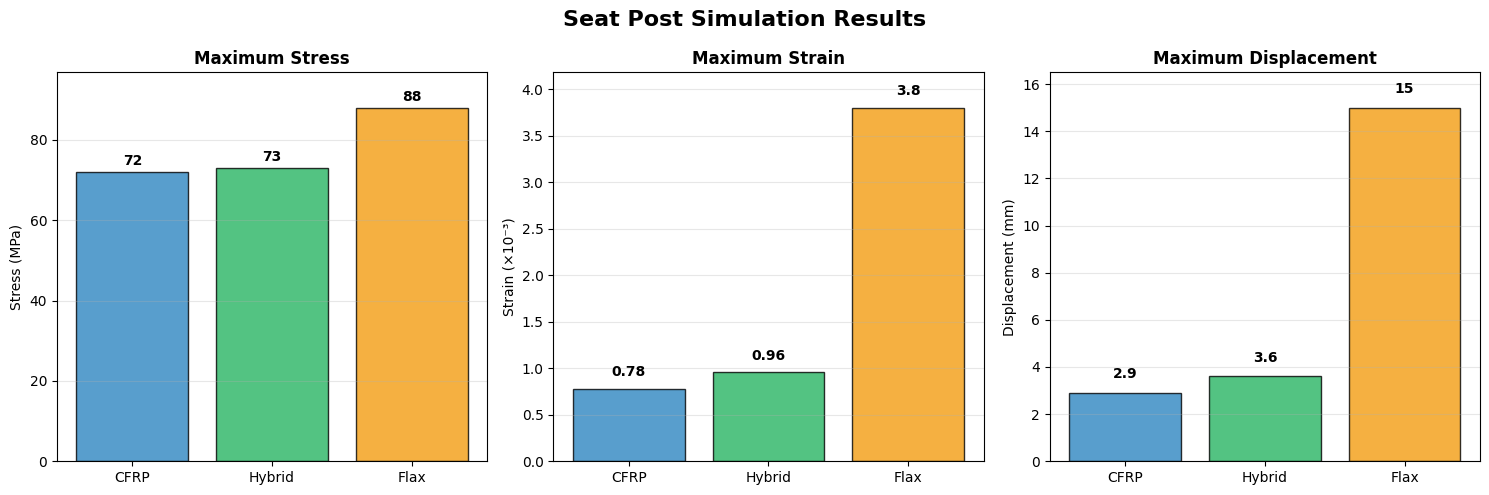

Histogram plots generated successfully!

Data Summary:
Materials: ['CFRP', 'Hybrid', 'Flax']
Max Stress (MPa): [72, 73, 88]
Max Strain (×10⁻³): [0.78, 0.96, 3.8]
Max Displacement (mm): [2.9, 3.6, 15]


In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your table
layup_types = ['CFRP', 'Hybrid', 'Flax']
max_stress = [72, 73, 88]  # MPa
max_strain = [0.78, 0.96, 3.8]  # x10^-3
max_displacement = [2.9, 3.6, 15]  # mm

# Set up the figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Seat Post Simulation Results', fontsize=16, fontweight='bold')

# Colors for each material
colors = ['#2E86C1', '#28B463', '#F39C12']  # Blue, Green, Orange

# Plot 1: Max Stress
axes[0].bar(layup_types, max_stress, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
axes[0].set_title('Maximum Stress', fontweight='bold')
axes[0].set_ylabel('Stress (MPa)')
axes[0].set_ylim(0, max(max_stress) * 1.1)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(max_stress):
    axes[0].text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# Plot 2: Max Strain
axes[1].bar(layup_types, max_strain, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
axes[1].set_title('Maximum Strain', fontweight='bold')
axes[1].set_ylabel('Strain (×10⁻³)')
axes[1].set_ylim(0, max(max_strain) * 1.1)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(max_strain):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

# Plot 3: Max Displacement
axes[2].bar(layup_types, max_displacement, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
axes[2].set_title('Maximum Displacement', fontweight='bold')
axes[2].set_ylabel('Displacement (mm)')
axes[2].set_ylim(0, max(max_displacement) * 1.1)
axes[2].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(max_displacement):
    axes[2].text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Optional: Save the figure
# plt.savefig('composite_materials_comparison.png', dpi=300, bbox_inches='tight')

# Alternative: Individual histograms if you prefer separate plots
def create_individual_plots():
    """Create individual histogram plots for each property"""
    
    # Individual plot for Max Stress
    plt.figure(figsize=(8, 6))
    plt.bar(layup_types, max_stress, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    plt.title('Maximum Stress Comparison', fontsize=14, fontweight='bold')
    plt.ylabel('Stress (MPa)', fontsize=12)
    plt.ylim(0, max(max_stress) * 1.1)
    plt.grid(axis='y', alpha=0.3)
    for i, v in enumerate(max_stress):
        plt.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Individual plot for Max Strain
    plt.figure(figsize=(8, 6))
    plt.bar(layup_types, max_strain, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    plt.title('Maximum Strain Comparison', fontsize=14, fontweight='bold')
    plt.ylabel('Strain (×10⁻³)', fontsize=12)
    plt.ylim(0, max(max_strain) * 1.1)
    plt.grid(axis='y', alpha=0.3)
    for i, v in enumerate(max_strain):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Individual plot for Max Displacement
    plt.figure(figsize=(8, 6))
    plt.bar(layup_types, max_displacement, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    plt.title('Maximum Displacement Comparison', fontsize=14, fontweight='bold')
    plt.ylabel('Displacement (mm)', fontsize=12)
    plt.ylim(0, max(max_displacement) * 1.1)
    plt.grid(axis='y', alpha=0.3)
    for i, v in enumerate(max_displacement):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()

# Uncomment the line below to create individual plots instead
# create_individual_plots()

print("Histogram plots generated successfully!")
print("\nData Summary:")
print(f"Materials: {layup_types}")
print(f"Max Stress (MPa): {max_stress}")
print(f"Max Strain (×10⁻³): {max_strain}")
print(f"Max Displacement (mm): {max_displacement}")

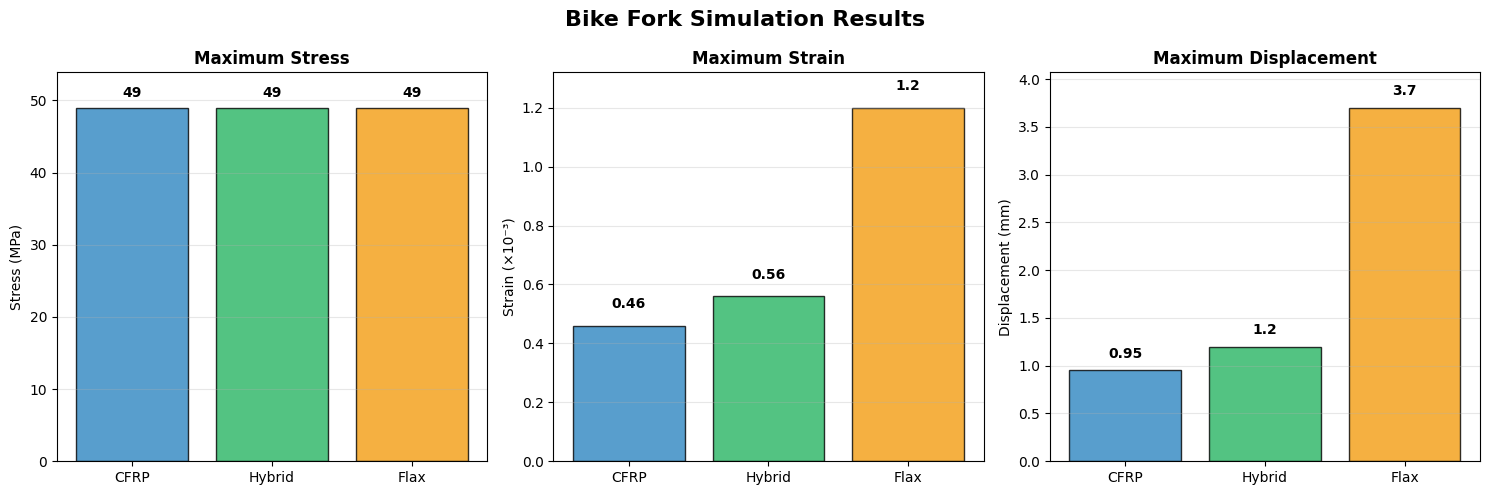

Histogram plots generated successfully!

Data Summary:
Materials: ['CFRP', 'Hybrid', 'Flax']
Max Stress (MPa): [49, 49, 49]
Max Strain (×10⁻³): [0.46, 0.56, 1.2]
Max Displacement (mm): [0.95, 1.2, 3.7]


In [55]:

# Data from your table
layup_types = ['CFRP', 'Hybrid', 'Flax']
max_stress = [49, 49, 49]  # MPa
max_strain = [0.46, 0.56, 1.2]  # x10^-3
max_displacement = [0.95, 1.2, 3.7]  # mm

# Set up the figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Bike Fork Simulation Results', fontsize=16, fontweight='bold')

# Colors for each material
colors = ['#2E86C1', '#28B463', '#F39C12']  # Blue, Green, Orange

# Plot 1: Max Stress
axes[0].bar(layup_types, max_stress, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
axes[0].set_title('Maximum Stress', fontweight='bold')
axes[0].set_ylabel('Stress (MPa)')
axes[0].set_ylim(0, max(max_stress) * 1.1)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(max_stress):
    axes[0].text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# Plot 2: Max Strain
axes[1].bar(layup_types, max_strain, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
axes[1].set_title('Maximum Strain', fontweight='bold')
axes[1].set_ylabel('Strain (×10⁻³)')
axes[1].set_ylim(0, max(max_strain) * 1.1)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(max_strain):
    axes[1].text(i, v + 0.05, str(v), ha='center', va='bottom', fontweight='bold')

# Plot 3: Max Displacement
axes[2].bar(layup_types, max_displacement, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
axes[2].set_title('Maximum Displacement', fontweight='bold')
axes[2].set_ylabel('Displacement (mm)')
axes[2].set_ylim(0, max(max_displacement) * 1.1)
axes[2].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(max_displacement):
    axes[2].text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Optional: Save the figure
# plt.savefig('composite_materials_comparison.png', dpi=300, bbox_inches='tight')

# Alternative: Individual histograms if you prefer separate plots
def create_individual_plots():
    """Create individual histogram plots for each property"""
    
    # Individual plot for Max Stress
    plt.figure(figsize=(8, 6))
    plt.bar(layup_types, max_stress, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    plt.title('Maximum Stress Comparison', fontsize=14, fontweight='bold')
    plt.ylabel('Stress (MPa)', fontsize=12)
    plt.ylim(0, max(max_stress) * 1.1)
    plt.grid(axis='y', alpha=0.3)
    for i, v in enumerate(max_stress):
        plt.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Individual plot for Max Strain
    plt.figure(figsize=(8, 6))
    plt.bar(layup_types, max_strain, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    plt.title('Maximum Strain Comparison', fontsize=14, fontweight='bold')
    plt.ylabel('Strain (×10⁻³)', fontsize=12)
    plt.ylim(0, max(max_strain) * 1.1)
    plt.grid(axis='y', alpha=0.3)
    for i, v in enumerate(max_strain):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Individual plot for Max Displacement
    plt.figure(figsize=(8, 6))
    plt.bar(layup_types, max_displacement, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    plt.title('Maximum Displacement Comparison', fontsize=14, fontweight='bold')
    plt.ylabel('Displacement (mm)', fontsize=12)
    plt.ylim(0, max(max_displacement) * 1.1)
    plt.grid(axis='y', alpha=0.3)
    for i, v in enumerate(max_displacement):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()

# Uncomment the line below to create individual plots instead
# create_individual_plots()

print("Histogram plots generated successfully!")
print("\nData Summary:")
print(f"Materials: {layup_types}")
print(f"Max Stress (MPa): {max_stress}")
print(f"Max Strain (×10⁻³): {max_strain}")
print(f"Max Displacement (mm): {max_displacement}")